# Example 2 - Part 4
## pH-Rate Profile Example - Kirby 2002

Tony Kirby is one of the giants of physical organic and bio-organic chemistry. In this paper he follows up on a decades-long series of papers investigating the mechanism of *amylases* that catalyze the hydrolysis of acetal groups in polysaccharide chains.

This *Python* notebook will plot the integrated rate equations that were used in the paper. As you now know the equation 3 in the paper is incorrect. **Here we will derive the correct equation.**

``Concerted general acid and nucleophilic catalysis of acetalhydrolysis. A simple model for the lysozyme mechanism''. K.E.S. Deana, A.J. Kirby, *J. Chem. Soc., Perkin Trans. 2*, **2002**, 428-432. https://doi.org/10.1039/B110948K. 


## Numeric Integration

Rather than use symbolic math tools like sympy, which usually require decisions and a bit of experience, we can use a more brute force method that is simpler to adapt to new systems. This is numerical methods.

All we have to do is establish a set of differential equations. Then the numeric integration solver of choice (there are many options) will calculate the concentrations over time for all components. Later we will also see how to use the same numeric model in curve fitting.

For our reaction system...

$$\text{A} \overset{k_1}{\longrightarrow} \text{I} $$
$$\text{I} \overset{k_2}{\longrightarrow} \text{P}$$

...we can easily derive the integrated rate equations that describe the concentrations of all three species over time. These are available in any physical chemistry book (and are also derived using *Python* code is the latter part of this notebook) and are presented below...

$$
\begin{align*}
\dfrac{d\left[A\right]_t}{dt} &= -k_1 \left[A\right]_t \\
\dfrac{d\left[I\right]_t}{dt} &= k_1 \left[A\right]_t - k_2 \left[I\right]_t \\
\dfrac{d\left[P\right]_t}{dt} &= k_1 \left[A\right]_t + k_2 \left[I\right]_t\\


\end{align*}
$$

### Performing the Integration

In the code below we establish a function that returns the rates of appearance of each of the three species give the time, concentrations at that moment in time and the two rate constants. Then we set values for all the parameters ($k_1$, $k_2$ and initial concentrations for A, I and P)

Then I created a list of time points at which to calculate the concentrations. 

After that I used the `scipy.integrate.solve_ivp` function to evaluate the values returned by the rate function (named `rates` in this example) give a time range, a set of time points at which to report values, the initial concentration values, and the values of the rate constants. Also we must choose a numeric method (`Radau` in this example). All the methods available are good for this simple case. I chose a method that had a reputation for speed but the problem is so small that speed wasn't a problem anyway.

The solve_ivp function returns the list of time points that I gave it and lists of the concentrations for the three species. These are plotted.

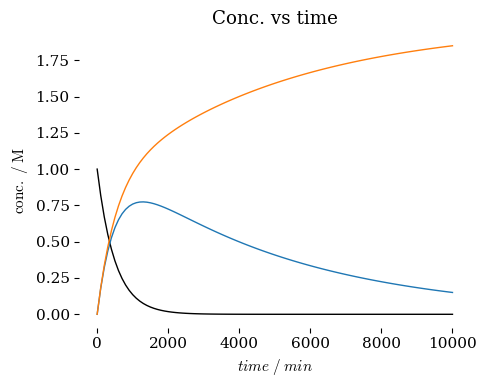

In [3]:
### from StealThisCode/4_SciPy/K05_NumericIntegration_SystemEq.ipynb

#######################
### import packages 
#######################

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

############################################
### Create a function that describes the 
### system of differential equations. 
############################################

def rates(t, c, k_1, k_2):  

    A = c[0]; I = c[1]; P = c[2]           ### assign initial conc. from input list c

    dA_dt = -k_1 * c[0]    ### rates of each reaction step with give concentration in list c
    dI_dt = k_1 * c[0]  - k_2 * c[1] 
    dP_dt = k_1 * c[0] + k_2 * c[1] 

    return [dA_dt, dI_dt, dP_dt]


############################################
### Parameters and experimental conditions
############################################

k_1 = 2e-3          ### Values for kinetic parameters
k_2 = 2e-4
A0_conc = 1

time_end = 10000   ### The end time
n_points = 100   ### number of points - increase if needed

#########################################
### Create series of time points      
#########################################

dt = time_end / n_points           ### time step, delta t
t_line = np.arange(0, time_end+dt, dt) ### time vector (list of time points)
num = len(t_line)

#########################################
### Integrate the system of differential equations      
#########################################

initial = [A0_conc, 0, 0]      ### Set list of initial values (A, I, P)

int = solve_ivp(rates,                ### the function being integrated. 
                [0, time_end],        ### start and endpoint of integration
                initial,              ### initial values
                method = "Radau",     ### 'RK45', 'RK23', 'LSODA', 'DOP853', 'Radau', 'BDF'
                t_eval = t_line,      ### time points at which to calculate values
#                first_step = 1e-5,    ### take a very small first step. the initial rate is much faster than the average slope.
                args = [k_1, k_2]  ### values to send to function after t and c
                )

#########################################
### Extract the results from the returned data object      
#########################################

time = int.t        ### solve_inp() returns an array for time indexed as 't'
yarray = int.y      ### Also retruns and array of calculated y values.
                    ###  if more than one value returned from function we will
                    ###  get a array of arrays for each value

##################################################################################
### Plot the results
##################################################################################

plt.rcdefaults()                    ### resets the plot defaults so we always start in the same place
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

#########################################
### Plot the line using the x_fit, y_fit points
#########################################
x = time      
y = yarray[0] 
ax.plot(x, y, 
        linestyle = '-',            ### use a line between points
 #       linewidth='0.5',            ### make the line thin
        color = 'C0',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

x = time      
y = yarray[1]
ax.plot(x, y, 
        linestyle = '-',            ### use a line between points
 #       linewidth='0.5',            ### make the line thin
        color = 'C1',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

x = time      
y = yarray[2]
ax.plot(x, y, 
        linestyle = '-',            ### use a line between points
 #       linewidth='0.5',            ### make the line thin
        color = 'C2',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )
#########################################
### Add more style
#########################################
        
ax.set(ylabel=r"$\rm conc.\;/\;M $", 
        xlabel=r"$time\; /\; min$",
        title = "Conc. vs time",
        xlim=[None, None],      
        ylim=[None, None])


fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.savefig("plot.pdf")    # use this to save the figure in PDF format
plt.show()                 # output the combined four plots



### Plotting Total Absorbance

In the code block below we convert the concentrations of the three species to their absorbance values and plot these values and the total value.

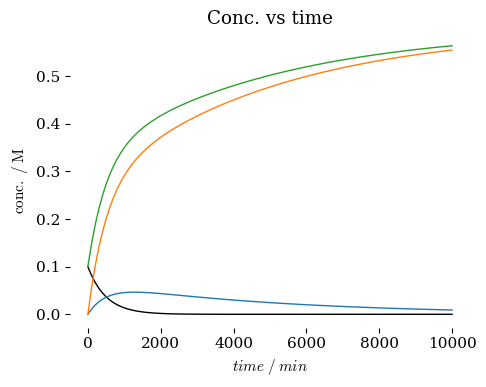

In [4]:
## Plot Absorbances

############################################
### Parameters and experimental conditions
############################################

eA = 1         ### extinction coefficients (ratios)
eI = 0.6
eP = 3
Abs0 = 0.1     ### Initial absorbance

##################################################################################
### Plot the results
##################################################################################

plt.rcdefaults()                    ### resets the plot defaults so we always start in the same place
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

#########################################
### Plot the line using the x_fit, y_fit points
#########################################
x = time      
y = yarray[0] * Abs0 * eA / eA
ax.plot(x, y, 
        linestyle = '-',            ### use a line between points
 #       linewidth='0.5',            ### make the line thin
        color = 'C0',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

x = time      
y = yarray[1]  * Abs0 * eI / eA
ax.plot(x, y, 
        linestyle = '-',            ### use a line between points
 #       linewidth='0.5',            ### make the line thin
        color = 'C1',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

x = time      
y = yarray[2]  * Abs0 * eP / eA
ax.plot(x, y, 
        linestyle = '-',            ### use a line between points
 #       linewidth='0.5',            ### make the line thin
        color = 'C2',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

x = time      
y = Abs0 * (yarray[0]*eA/eA + yarray[1]*eI/eA + yarray[2]* eP/eA)
ax.plot(x, y, 
        linestyle = '-',            ### use a line between points
 #       linewidth='0.5',            ### make the line thin
        color = 'C3',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

#########################################
### Add more style
#########################################
        
ax.set(ylabel=r"$\rm conc.\;/\;M $", 
        xlabel=r"$time\; /\; min$",
        title = "Conc. vs time",
        xlim=[None, None],      
        ylim=[None, None])


fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.savefig("plot.pdf")    # use this to save the figure in PDF format
plt.show()                 # output the combined four plots
